# Linear Regression


## make_regression(n_samples, n_features, bias, noise)

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [3]:
# It makes 1,000 pieces of datas, 1 feature
data = make_regression(n_samples = 1000, n_features = 1, bias = 1000, noise = 50, random_state = 1)
data

(array([[-1.06787658e+00],
        [-2.91594596e-01],
        [ 5.08077548e-02],
        [ 6.21803504e-01],
        [-5.45774168e-01],
        [ 1.55501599e+00],
        [-2.09752935e-01],
        [ 1.78975468e+00],
        [-7.67803746e-01],
        [ 1.47073986e+00],
        [-2.86384915e-01],
        [-3.64538050e-01],
        [ 4.03491642e-01],
        [ 3.37220938e-01],
        [ 8.64644065e-02],
        [-1.67419581e+00],
        [-9.24323185e-02],
        [ 5.20576337e-01],
        [ 1.46089238e+00],
        [-9.15424368e-01],
        [-1.61198320e-01],
        [ 1.57546791e+00],
        [ 7.44884536e-01],
        [ 1.04499441e+00],
        [-2.79099641e+00],
        [-7.47158294e-01],
        [-1.11711069e+00],
        [-1.09033833e+00],
        [ 8.59870972e-01],
        [ 1.90915485e-01],
        [-3.31283170e-01],
        [-4.23478297e-01],
        [ 3.19656942e-01],
        [-1.94504696e+00],
        [-8.80577600e-01],
        [ 8.38634747e-01],
        [-1.56450785e+00],
 

In [7]:
# assigne data[0] to X_data and data[1] to y_data
X_data = data[0]
y_data = data[1]
X_data, y_data

(array([[-1.06787658e+00],
        [-2.91594596e-01],
        [ 5.08077548e-02],
        [ 6.21803504e-01],
        [-5.45774168e-01],
        [ 1.55501599e+00],
        [-2.09752935e-01],
        [ 1.78975468e+00],
        [-7.67803746e-01],
        [ 1.47073986e+00],
        [-2.86384915e-01],
        [-3.64538050e-01],
        [ 4.03491642e-01],
        [ 3.37220938e-01],
        [ 8.64644065e-02],
        [-1.67419581e+00],
        [-9.24323185e-02],
        [ 5.20576337e-01],
        [ 1.46089238e+00],
        [-9.15424368e-01],
        [-1.61198320e-01],
        [ 1.57546791e+00],
        [ 7.44884536e-01],
        [ 1.04499441e+00],
        [-2.79099641e+00],
        [-7.47158294e-01],
        [-1.11711069e+00],
        [-1.09033833e+00],
        [ 8.59870972e-01],
        [ 1.90915485e-01],
        [-3.31283170e-01],
        [-4.23478297e-01],
        [ 3.19656942e-01],
        [-1.94504696e+00],
        [-8.80577600e-01],
        [ 8.38634747e-01],
        [-1.56450785e+00],
 

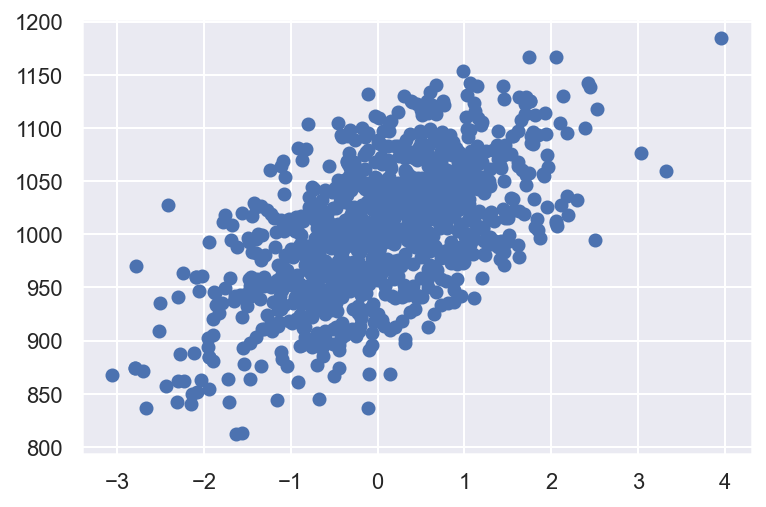

In [10]:
# Let's graph the virtual data set created above
plt.scatter(data[0], data[1]);

In [16]:
# Let's convert to the random dataset into DataFrame
random_df = pd.DataFrame(data[0], columns=['X_data'])
random_df['y_data'] = y_data
random_df.head()

,X_data,y_data
0,-1.067877,1053.612513
1,-0.291595,1024.668837
2,0.050808,1065.791445
3,0.621804,1094.990280
4,-0.545774,1006.384416


In [18]:
# Let's divide the generated virtual data into trainning data and verification data
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, shuffle=True)

In [143]:
class LinearRegressioin():
    def __init__(self, learning_rate=0.01, max_iter=100, **kwargs):
        """
        [hyper_parameter]
        learning_rate: 학습률
        max_iter: 반복 최대치
        kwargs: 재사용을 위해 선언만.
        """
        self._learning_rate = learning_rate
        self.max_iter = max_iter
        self.W_ = None
    
    # 학습과정
    def fit(self, X_data, y_data):
        
        # 1. 랜덤값으로 Weight 초기값 설정(feature개수 + 1만큼)
        self.weight_list_ = []
        self.gradient_list_ = []
        # X [[1], [2], [3], ...]
        
        num_sample, num_col = np.shape(X_data)
        # Beta(Theta) 추가
        #H(x) = W1*X + W0
        #H(x) = W1*X + 1*W0
        self.W_ = np.random.random(size=(num_col+1))
        X_data = np.c_[X_data, np.ones(num_sample)] # 1벡터 1열 추가하기
        X_data_T = X_data.T
        
        # 2. 경사하강법을 활용하여 예측성능을 높이는 과정을 반복
        for i in range(self.max_iter):
            # 실제값과 예측값의 차기(err)
            err = np.dot(X_data, self.W_) - y_data
            
            # err 이용하여 cost(=MSE) 생성 : 오차의 제곱합 / 2 * 데이터 개수 = cost
            cost = np.sum(err**2) / (2 * num_sample)
            
            # 새로운 w = w - learning_rate*()
            gradient = np.dot(X_data_T, err) / num_sample
            
            # Weight 업데이트
            self.W_ = self.W_ - (self._learning_rate*gradient)
            
            self.gradient_list_.append(gradient)
            self.weight_list_.append(self.W_)
            
        # 3. 최종 Weight값이 적용된 모델을 return
        return self
    
    # 예측과정
    def predict(self, X_data):
        num_sample, num_col = np.shape(X_data)
        X_data = np.c_[X_data, np.ones(num_sample)]
        # 학습된 Weight값과 입력받은 데이터를 곱하여 예측값을 return
        return np.dot(X_data, self.W_)
    
    #평가 과정
    def score(self, X_data, y_data):
        
        # 1. 입력받은 데이터에 대해 predict() 함수를 통해 예측 결과를 받는다.
        # 2. 오류(= (회귀식을 통해 얻은 예측값과 실제값의 차이)^2의 평균)를 구한다
        err = np.mean(np.square(y_data - self.predict(X_data)))
        # 3. 분산(= (회귀식을 통해 얻은 예측값과 실제값 평균의 차이)**2의 평균)을 구한다.
        var = np.mean(np.square(y_data - np.mean(y_data)))
        
        # 4. R2 score(= 1 (오류 / 분산))을 return 한다.
        return 1 - (err/var)

In [144]:
LR = LinearRegressioin(max_iter=100000)

In [145]:
LR.fit(X_train, y_train)

In [146]:
LR.predict(X_test)

array([ 966.28599333, 1014.33209448, 1020.09422702,  971.86971562,
        987.43457485,  996.10335699,  998.11755842, 1017.46271926,
       1040.96114649,  980.8625928 , 1004.63765696, 1026.79898772,
       1001.95117241, 1055.21448144,  930.85458357,  968.70538004,
        992.65255168, 1027.60462168, 1014.08529759, 1022.47806213,
        920.15642327, 1024.16645914,  982.70580727, 1046.52581561,
       1002.56967351,  989.06263226,  899.25178233,  945.8838505 ,
       1018.27298563,  979.57898298,  981.60396842, 1043.36051627,
        985.88223628,  968.9404142 ,  987.5875257 ,  978.3086394 ,
        933.87863825,  978.39299831,  980.42976207,  993.38948548,
        988.80750148,  970.65740613,  964.57601108, 1058.60714842,
       1026.12538457, 1058.50671643,  969.56382344, 1074.23861511,
       1042.89602466,  984.24600432, 1045.81044775, 1039.02773888,
        977.20846905, 1001.54685031,  994.24046255,  992.19728784,
        929.97352711,  983.42836704, 1034.62544362,  954.21235

In [147]:
LR.score(X_test, y_test)

0.3813484354698088

In [148]:
LR.gradient_list_

[array([  -71.18761001, -1001.05369369]),
 array([ -70.14195383, -991.01804547]),
 array([ -69.11001018, -981.08312259]),
 array([ -68.09161015, -971.24791295]),
 array([ -67.0865868 , -961.51141465]),
 array([ -66.09477518, -951.87263585]),
 array([ -65.11601229, -942.3305947 ]),
 array([ -64.15013706, -932.88431921]),
 array([ -63.19699034, -923.53284719]),
 array([ -62.25641486, -914.27522611]),
 array([ -61.32825521, -905.11051303]),
 array([ -60.41235784, -896.03777449]),
 array([ -59.50857101, -887.05608641]),
 array([ -58.61674479, -878.16453402]),
 array([ -57.73673103, -869.36221174]),
 array([ -56.86838333, -860.64822312]),
 array([ -56.01155705, -852.02168068]),
 array([ -55.16610925, -843.48170591]),
 array([ -54.3318987 , -835.02742912]),
 array([ -53.50878586, -826.65798937]),
 array([ -52.69663284, -818.37253436]),
 array([ -51.89530338, -810.17022039]),
 array([ -51.10466287, -802.05021223]),
 array([ -50.32457829, -794.01168304]),
 array([ -49.55491821, -786.05381432])

In [150]:
LR.weight_list_

[array([ 1.39252364, 10.98404547]),
 array([ 2.09394318, 20.89422593]),
 array([ 2.78504328, 30.70505715]),
 array([ 3.46595938, 40.41753628]),
 array([ 4.13682525, 50.03265043]),
 array([ 4.797773  , 59.55137679]),
 array([ 5.44893312, 68.97468274]),
 array([ 6.09043449, 78.30352593]),
 array([ 6.7224044, 87.5388544]),
 array([ 7.34496854, 96.68160666]),
 array([  7.9582511 , 105.73271179]),
 array([  8.56237467, 114.69308954]),
 array([  9.15746038, 123.5636504 ]),
 array([  9.74362783, 132.34529574]),
 array([ 10.32099514, 141.03891786]),
 array([ 10.88967898, 149.64540009]),
 array([ 11.44979455, 158.1656169 ]),
 array([ 12.00145564, 166.60043395]),
 array([ 12.54477463, 174.95070825]),
 array([ 13.07986248, 183.21728814]),
 array([ 13.60682881, 191.40101348]),
 array([ 14.12578185, 199.50271569]),
 array([ 14.63682848, 207.52321781]),
 array([ 15.14007426, 215.46333464]),
 array([ 15.63562344, 223.32387278]),
 array([ 16.12357897, 231.10563074]),
 array([ 16.6040425 , 238.80939899